#### Izradio: Damir Čupić
![alt text](./Materijali/Slike/Header.png)

# "Igra godine" - pregled najboljih videoigara kroz dva desetljeća

In [1]:
#importovi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Audio
from datetime import datetime

In [2]:
#Pozadinski Soundtrack
Audio(filename="./Materijali/Soundtrack/Track" + str(datetime.now().second%4) + ".mp3", autoplay=True)

# 1. Uvod
Ovaj esej potaknut je nedavnom vatrom koju je stvorio legendarni dvoboj igara **The Last Of Us** i **God Of War** za megaBAFTA-u:

<div style="padding:40px;">
<img src="./Materijali/Slike/Tweet.png" width="600"/>
</div>

Stoga je naglasak upravo na **BAFTA Games** game of the year nagradi, ali i na nagrade **The Game Awards**, **Game Developer Choice Award** i **Golden Joystick Awards** u nešto manje detalje. Analogija je slična općenito popularnijim filmskim nagradama Oskar ili Zlatni Globus. U daljnjem tekstu često će se pojaviti kratica **GOTY** što znači **Game of the year** odnosno **igra godine**. Sama razrada eseja bazirat će se na podacima o igrama pobjednicama GOTY nagrada, njihovim žanrom, ekonomskim uspjehom, kreator te ocjenom igrača.


# 2. Pregled podataka
***
Izvori:

podaci o **broju prodanih primjeraka** igara:
https://www.kaggle.com/gregorut/videogamesales/data

podaci o **godišnje najprodavanijim** igrama:
https://en.wikipedia.org/wiki/List_of_best-selling_video_games

podaci o **GOTY nagradama**:
https://en.wikipedia.org/wiki/List_of_Game_of_the_Year_awards
***

In [3]:
#tablica sa BAFTA goty naslovima
bafta = pd.read_csv('./Materijali/goty_tablica.csv', encoding='ISO-8859-1')
bafta = bafta.sort_values('Year')
bafta.set_index('Year', inplace=True)

#tablica sa svim goty naslovima
goty = pd.read_csv('./Materijali/goty_tablica_sve.csv', encoding='ISO-8859-1')
goty = goty.sort_values('Year')
goty.set_index('Year', inplace=True)

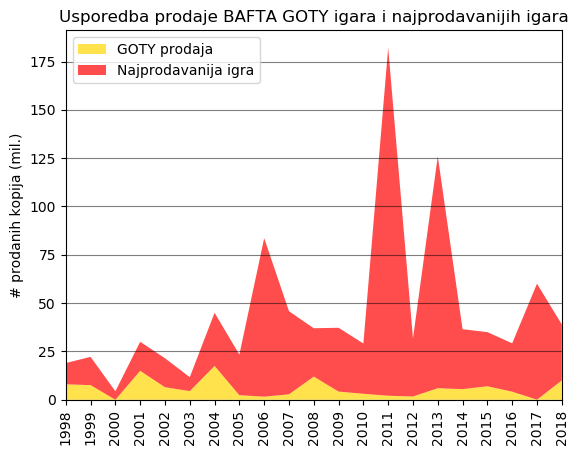

In [4]:
#graf prodanih nagrađenih igara i najprodavanijih igara po godinama
plt.rcdefaults()
fig, ax = plt.subplots()

#varijable
boje = ["gold", "red"]
legenda = ['GOTY prodaja', 'Najprodavanija igra']

#plot
ax.stackplot(range(1998, 2019), bafta['Sold'], bafta['Most Sold'], colors=boje, labels=legenda, alpha=0.7)

#postavke plota
ax.legend(loc='upper left')
ax.set_ylabel('# prodanih kopija (mil.)')
ax.set_title('Usporedba prodaje BAFTA GOTY igara i najprodavanijih igara')

#dodatne postavke
plt.xticks(range(1998, 2019), rotation='vertical')
plt.xlim(1998, 2018)
plt.grid(True, 'major', 'y', color='k', linestyle='-', alpha=0.5)

plt.show()

Iz prethodnog grafa vidi se da GOTY videoigre nisu ujedno i najpopularnije u pripadnim godinama. Međutim, to ne znači da nisu uspješne. Uspješnost zapravo fluktuira među naslovima iz godine u godinu. Nekoliko milijuna prodanih primjeraka često se smatra velikim uspjehom. No to uveliko ovisi o budžetu. Također postoje videoigre kojima ukupni budžet raste (primjerice online videoigre koje imaju troškove održavanja servera ili izdaju redovite nadogradnje/update-ove). Još jedan faktor koji je uvijek dobro uračunati kada je riječ o ovoj vrsti nagrada je pristranost nagrađivača. Naime videoigre koje su potencijalni pobjednici nagrada u pravilu zadovoljavaju specifičnu (manju) publiku, pa stoga ona financijski zaostaje za videoigrama orijentiranim masovnoj publici.

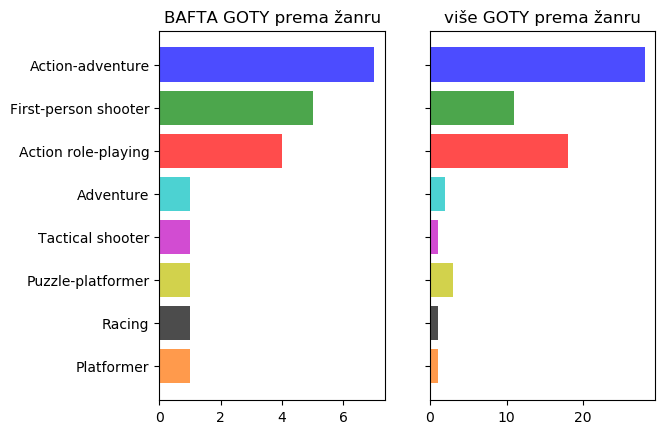

In [5]:
#graf BAFTA GOTY igara prema žanru
plt.rcdefaults()
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row')

#varijable
boje = ['b','g','r','c','m','y','k',"#ff7000"]
names = bafta['Genre'].value_counts().index.tolist()
values1 = np.array([len(bafta[bafta['Genre'] == val]) for val in names])
values2 = np.array([len(goty[goty['Genre'] == val]) for val in names])

#postavke grafa
ax1.barh(names, values1, color=boje, align='center', alpha=0.7)
ax1.invert_yaxis()
ax1.set_title('BAFTA GOTY prema žanru')
ax2.barh(names, values2, color=boje, align='center', alpha=0.7)
ax2.set_title('više GOTY prema žanru')

plt.show()

In [14]:
#tablica broja prestižnih goty nagrada prema kreatoru
#varijable
names = goty['Developer'].value_counts().index.tolist()
values = goty['Developer'].value_counts().tolist()

#tablica
table = pd.DataFrame({'x':names, 'y':values})
table = table.shift(1).drop(table.index[0])
table.columns = ['Kreator', '# GOTY']

table.head()

Kreator  # GOTY
1  Bethesda Game Studios     8.0
2         Rockstar North     6.0
3            Naughty Dog     5.0
4                BioWare     5.0
5                  Valve     5.0